### 직선 검출 및 제거

#### 실내 바닥면 이미지에서 센서 위치 때문에 마스킹한 그리드의 검출 및 제거가 필요함

In [1]:
import cv2
import numpy as np

In [2]:
path = "image/20240102_160513.jpg"

# 이미지 불러오기
image = cv2.imread(path)

# 이미지 크기 축소
scale_percent = 20
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
resized_image = cv2.resize(image, (width, height))

In [3]:
def detect_lines(image):
    # 그레이스케일로 변환
    image_copy = image.copy()
    gray = cv2.cvtColor(image_copy, cv2.COLOR_BGR2GRAY)

    # 가우시안 블러로 잡음 제거 -> 잡음 제거 했더니 조도 낮은 곳(안쪽 구역 : P7~9)의 엣지 검출이 잘 안됨. OUT!!
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny Edge 검출
    edges = cv2.Canny(gray, 50, 150)

    # 허프 변환으로 직선 검출
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength = 300, maxLineGap = 200)
    line_mask = np.zeros_like(gray)
   
    
    # 이미지에 선 그려서 검출 결과 확인
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_mask, (x1, y1), (x2, y2), 255, 2)
        cv2.line(image_copy, (x1, y1), (x2, y2), 255, 2)
    
    return image_copy, line_mask

In [4]:
# inpaint로 직선 제거 (이웃 픽셀 가져와서 채움)
def remove_line(image, line_mask):
    result_image = cv2.inpaint(image, line_mask, inpaintRadius=5, flags=cv2.INPAINT_NS)
    return result_image

In [5]:
image_with_lines, line_mask = detect_lines(resized_image)
remove_result_image = remove_line(resized_image, line_mask)

In [13]:
import matplotlib.pyplot as plt

def show_image(image, title):
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

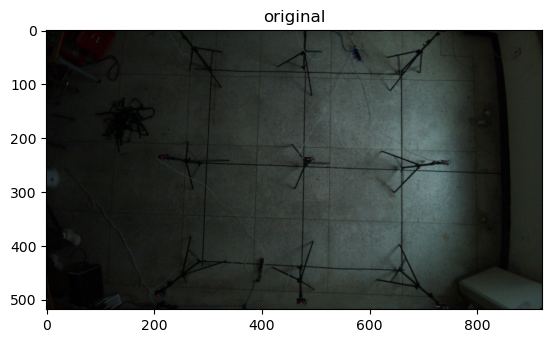

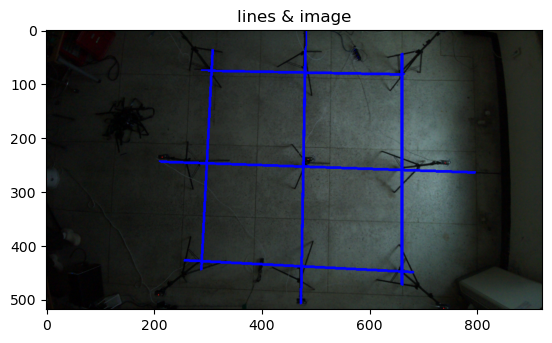

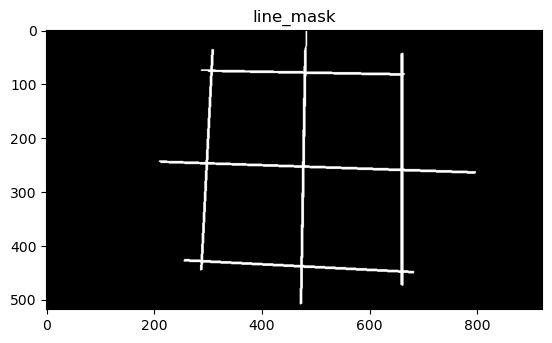

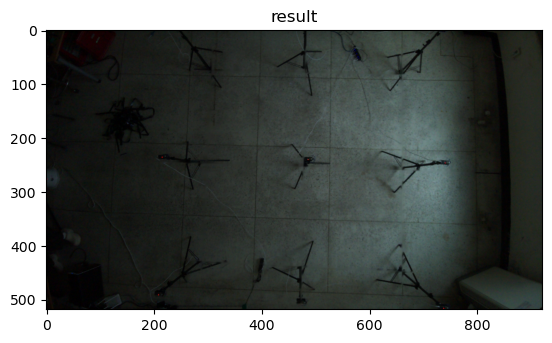

In [16]:
show_image(resized_image, "original")
show_image(image_with_lines, "lines & image")
show_image(line_mask, "line_mask")
show_image(remove_result_image, "result")